### Задача - 3
#### Имя - Хурматулла  ----- Фамилия - Карими ------ Группа - 22.М07-мм

Количество вопросов, которые я решил: Числа (1,2,3,4,5,6,7,9).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OutputCodeClassifier
import time
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
datasets = pd.read_csv('iris.csv')
datasets.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
datasets.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [4]:
datasets.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
datasets = datasets.drop(['Id'], axis=1)
datasets.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
datasets.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:xlabel='SepalLengthCm', ylabel='count'>

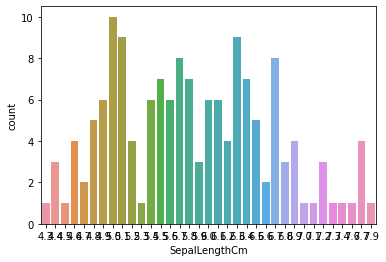

In [7]:
sns.countplot('SepalLengthCm', data=datasets)

<AxesSubplot:xlabel='SepalWidthCm', ylabel='count'>

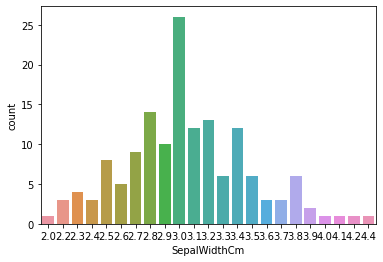

In [8]:
sns.countplot('SepalWidthCm', data=datasets)

<AxesSubplot:xlabel='PetalLengthCm', ylabel='count'>

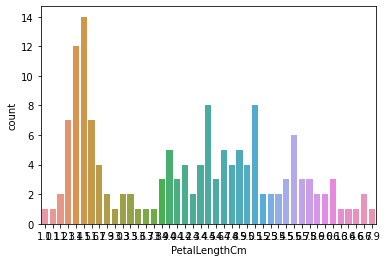

In [9]:
sns.countplot('PetalLengthCm', data=datasets)

<AxesSubplot:xlabel='PetalWidthCm', ylabel='count'>

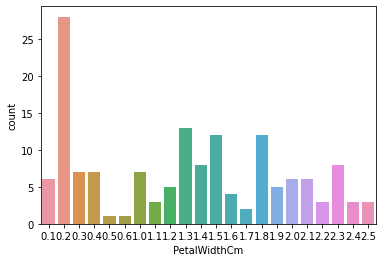

In [10]:
sns.countplot('PetalWidthCm', data=datasets)

<Figure size 2160x2160 with 0 Axes>

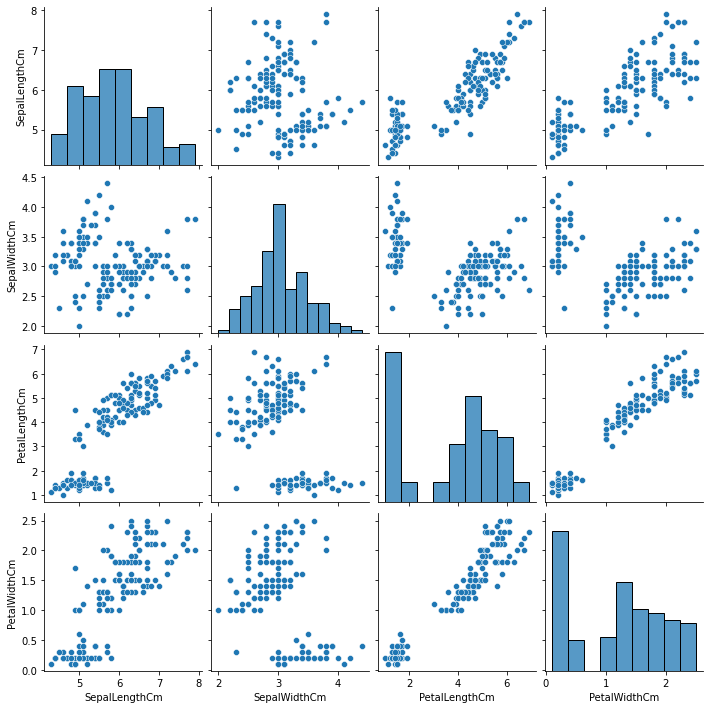

In [11]:
plt.figure(figsize = (30,30))
sns.pairplot(datasets)
plt.show()

In [12]:
numeric_columns = datasets.select_dtypes(include =['int64','float64'])
numeric_columns.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


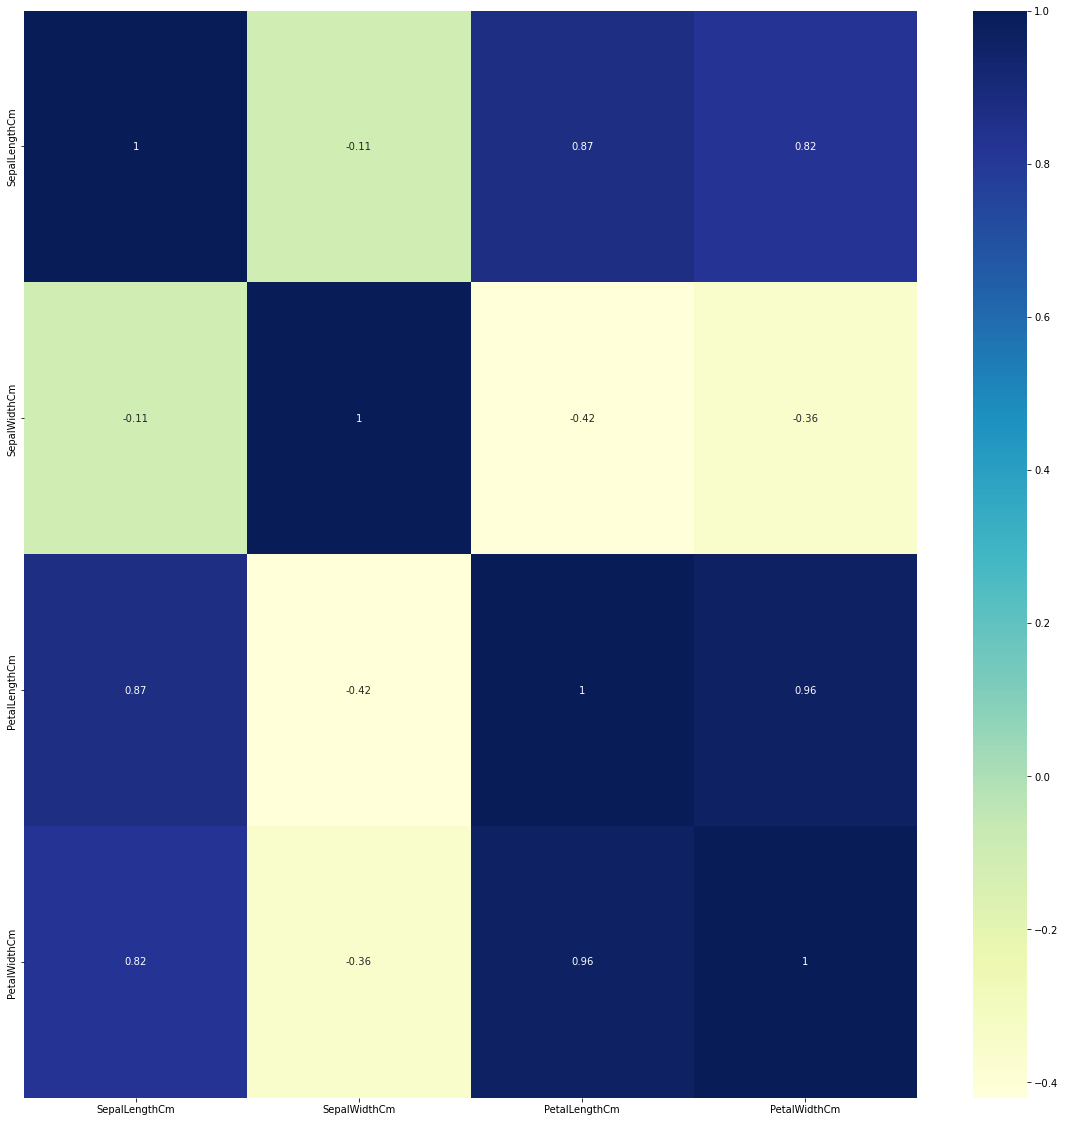

In [13]:
plt.figure(figsize = (20,20))
sns.heatmap(datasets.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

In [14]:
categorical_cols = datasets.select_dtypes(include=['object'])
categorical_cols.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [15]:
le = LabelEncoder()
datasets.Species = le.fit_transform(datasets.Species)
datasets.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
datasets.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
datasets.SepalLengthCm.value_counts()

5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: SepalLengthCm, dtype: int64

In [18]:
datasets.SepalWidthCm.value_counts()

3.0    26
2.8    14
3.2    13
3.1    12
3.4    12
2.9    10
2.7     9
2.5     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.7     3
2.4     3
2.2     3
3.6     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: SepalWidthCm, dtype: int64

In [19]:
datasets.PetalLengthCm.value_counts()

1.5    14
1.4    12
5.1     8
4.5     8
1.6     7
1.3     7
5.6     6
4.7     5
4.9     5
4.0     5
4.2     4
5.0     4
4.4     4
4.8     4
1.7     4
3.9     3
4.6     3
5.7     3
4.1     3
5.5     3
6.1     3
5.8     3
3.3     2
5.4     2
6.7     2
5.3     2
5.9     2
6.0     2
1.2     2
4.3     2
1.9     2
3.5     2
5.2     2
3.0     1
1.1     1
3.7     1
3.8     1
6.6     1
6.3     1
1.0     1
6.9     1
3.6     1
6.4     1
Name: PetalLengthCm, dtype: int64

In [20]:
datasets.PetalWidthCm.value_counts()

0.2    28
1.3    13
1.8    12
1.5    12
1.4     8
2.3     8
1.0     7
0.4     7
0.3     7
0.1     6
2.1     6
2.0     6
1.2     5
1.9     5
1.6     4
2.5     3
2.2     3
2.4     3
1.1     3
1.7     2
0.6     1
0.5     1
Name: PetalWidthCm, dtype: int64

In [21]:
datasets.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [22]:
X = datasets.drop('Species', axis = 1).values
Y = datasets['Species'].values

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=13)

In [24]:
X_train.shape

(120, 4)

In [25]:
y_train.shape

(120,)

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Логистическая регрессия

In [27]:
get_param = { 'C' : np.logspace(-2, 4, 10)}
grid_lg = GridSearchCV(LogisticRegression(), get_param, scoring="roc_auc", cv=5)

### Один-Против-Остальных

In [28]:
start_time = time.time()
ovr = OneVsRestClassifier(grid_lg)
ovr.fit(X_train, y_train)
y_pred = ovr.predict(X_test)
one_vs_rest_lg = accuracy_score(y_test, y_pred)
one_vs_rest_lg_time = time.time() - start_time
print("Accuracy_score: ", one_vs_rest_lg)
print("Measure time of training dataset", one_vs_rest_lg_time)

Accuracy_score:  0.9333333333333333
Measure time of training dataset 3.6589980125427246


### Один на один

In [29]:
start_time = time.time()
ovo = OneVsOneClassifier(grid_lg)
ovo.fit(X_train, y_train)
y_pred_ovo = ovo.predict(X_test)
one_vs_one_lg = accuracy_score(y_test, y_pred_ovo)
one_vs_one_lg_time = time.time() - start_time
print("Accuracy_score: ", one_vs_one_lg)
print("Measure time of training dataset", one_vs_one_lg_time)

Accuracy_score:  0.9666666666666667
Measure time of training dataset 3.5549964904785156


### Классификатор выходного кода

In [30]:
start_time = time.time()
opc = OutputCodeClassifier(grid_lg)
opc.fit(X_train, y_train)
y_pred_opc = opc.predict(X_test)
output_lg = accuracy_score(y_test, y_pred_opc)
output_lg_time = time.time() - start_time
print("Accuracy_score: ", output_lg)
print("Measure time of training dataset", output_lg_time)

Accuracy_score:  0.9666666666666667
Measure time of training dataset 4.525997877120972


## метод опорных векторов

In [31]:
get_param_svm = {'C': [0.1, 1, 5, 50, 500], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.00023],
              'kernel': ['rbf']}

grid_svm = GridSearchCV(SVC(), get_param_svm, scoring="roc_auc", cv=5)

### Один-Против-Остальных

In [32]:
start_time = time.time()
ovr_svm = OneVsRestClassifier(grid_svm)
ovr_svm.fit(X_train, y_train)
y_pred = ovr_svm.predict(X_test)
one_vs_rest_svm = accuracy_score(y_test, y_pred)
one_vs_rest_svm_time = time.time() - start_time
print("Accuracy_score: ", one_vs_rest_svm)
print("Measure time of training dataset", one_vs_rest_svm_time)

Accuracy_score:  0.9666666666666667
Measure time of training dataset 3.58599591255188


### Один на один

In [33]:
start_time = time.time()
ovo_svm = OneVsOneClassifier(grid_svm)
ovo_svm.fit(X_train, y_train)
y_pred = ovo_svm.predict(X_test)
one_vs_one_svm = accuracy_score(y_test, y_pred)
one_vs_one_svm_time = time.time() - start_time
print("Accuracy_score: ", one_vs_one_svm)
print("Measure time of training dataset", one_vs_one_svm_time)

Accuracy_score:  0.9333333333333333
Measure time of training dataset 3.3659985065460205


### Классификатор выходного кода

In [34]:
start_time = time.time()
opc_svm = OutputCodeClassifier(grid_lg)
opc_svm.fit(X_train, y_train)
y_pred_opc_svm = opc_svm.predict(X_test)
output_svm = accuracy_score(y_test, y_pred_opc_svm)
output_svm_time = time.time() - start_time
print("Accuracy_score: ", output_svm)
print("Measure time of training dataset", output_svm_time)

Accuracy_score:  0.7
Measure time of training dataset 2.1699986457824707


### КНН

In [35]:
get_param_knn = {'n_neighbors': np.arange(1, 11,2)}
grid_knn = GridSearchCV(KNeighborsClassifier(), get_param_knn, scoring="roc_auc", cv=5)

### Один-Против-Остальных

In [36]:
start_time = time.time()
ovr_knn = OneVsRestClassifier(grid_knn)
ovr_knn.fit(X_train, y_train)
y_pred = ovr_knn.predict(X_test)
one_vs_rest_knn = accuracy_score(y_test, y_pred)
one_vs_rest_knn_time = time.time() - start_time
print("Accuracy_score: ", one_vs_rest_knn)
print("Measure time of training dataset", one_vs_rest_knn_time)

Accuracy_score:  0.9666666666666667
Measure time of training dataset 0.6829979419708252


### Один на один

In [37]:
start_time = time.time()
ovo_knn = OneVsOneClassifier(grid_knn)
ovo_knn.fit(X_train, y_train)
y_pred = ovo_svm.predict(X_test)
one_vs_one_knn = accuracy_score(y_test, y_pred)
one_vs_one_knn_time = time.time() - start_time
print("Accuracy_score: ", one_vs_one_knn)
print("Measure time of training dataset", one_vs_one_knn_time)

Accuracy_score:  0.9333333333333333
Measure time of training dataset 0.8119988441467285


### Классификатор выходного кода

In [38]:
start_time = time.time()
opc_knn = OutputCodeClassifier(grid_knn)
opc_knn.fit(X_train, y_train)
y_pred_opc_knn = opc_svm.predict(X_test)
output_knn = accuracy_score(y_test, y_pred_opc_knn)
output_knn_time = time.time() - start_time
print("Accuracy_score: ", output_knn)
print("Measure time of training dataset", output_knn_time)

Accuracy_score:  0.7
Measure time of training dataset 0.5719950199127197


### Наивный Байес

In [39]:
get_param_nb = {'priors': [None, [0.62, 0.38]],
                'var_smoothing':np.logspace(0, -9, num=100)
                }
grid_nb = GridSearchCV(GaussianNB(), get_param_nb, scoring="roc_auc", cv=5)

### Один-Против-Остальных

In [40]:
start_time = time.time()
ovr_nb = OneVsRestClassifier(grid_nb)
ovr_nb.fit(X_train, y_train)
y_pred = ovr_nb.predict(X_test)
one_vs_rest_nb = accuracy_score(y_test, y_pred)
one_vs_rest_nb_time = time.time() - start_time
print("Accuracy_score: ", one_vs_rest_nb)
print("Measure time of training dataset", one_vs_rest_nb_time)

Accuracy_score:  0.9666666666666667
Measure time of training dataset 21.478994846343994


### Один на один

In [41]:
start_time = time.time()
ovo_nb = OneVsOneClassifier(grid_nb)
ovo_nb.fit(X_train, y_train)
y_pred = ovo_nb.predict(X_test)
one_vs_one_nb = accuracy_score(y_test, y_pred)
one_vs_one_nb_time = time.time() - start_time
print("Accuracy_score: ", one_vs_one_nb)
print("Measure time of training dataset", one_vs_one_nb_time)

Accuracy_score:  0.9666666666666667
Measure time of training dataset 15.130996465682983


### Классификатор выходного кода

In [42]:
start_time = time.time()
opc_nb = OutputCodeClassifier(grid_nb)
opc_nb.fit(X_train, y_train)
y_pred_opc_nb = opc_svm.predict(X_test)
output_nb = accuracy_score(y_test, y_pred_opc_nb)
output_nb_time = time.time() - start_time
print("Accuracy_score: ", output_nb)
print("Measure time of training dataset", output_nb_time)

Accuracy_score:  0.7
Measure time of training dataset 13.868995666503906


### Дерево решений

In [43]:
get_param_dt = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), get_param_dt, verbose=1, cv=5)

### Один-Против-Остальных

In [44]:
start_time = time.time()
ovr_dt = OneVsRestClassifier(grid_dt)
ovr_dt.fit(X_train, y_train)
y_pred = ovr_dt.predict(X_test)
one_vs_rest_dt = accuracy_score(y_test, y_pred)
one_vs_rest_dt_time = time.time() - start_time
print("Accuracy_score: ", one_vs_rest_dt)
print("Measure time of training dataset", one_vs_rest_dt_time)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits
Fitting 5 folds for each of 294 candidates, totalling 1470 fits
Fitting 5 folds for each of 294 candidates, totalling 1470 fits
Accuracy_score:  1.0
Measure time of training dataset 11.41903281211853


### Один на один

In [45]:
start_time = time.time()
ovo_dt = OneVsOneClassifier(grid_dt)
ovo_dt.fit(X_train, y_train)
y_pred = ovo_dt.predict(X_test)
one_vs_one_dt = accuracy_score(y_test, y_pred)
one_vs_one_dt_time = time.time() - start_time
print("Accuracy_score: ", one_vs_one_dt)
print("Measure time of training dataset", one_vs_one_dt_time)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits
Fitting 5 folds for each of 294 candidates, totalling 1470 fits
Fitting 5 folds for each of 294 candidates, totalling 1470 fits
Accuracy_score:  0.9666666666666667
Measure time of training dataset 10.37799859046936


### Классификатор выходного кода

In [46]:
start_time = time.time()
opc_dt = OutputCodeClassifier(grid_dt)
opc_dt.fit(X_train, y_train)
y_pred_opc_dt = opc_svm.predict(X_test)
output_dt = accuracy_score(y_test, y_pred_opc_dt)
output_dt_time = time.time() - start_time
print("Accuracy_score: ", output_dt)
print("Measure time of training dataset", output_dt_time)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits
Fitting 5 folds for each of 294 candidates, totalling 1470 fits
Fitting 5 folds for each of 294 candidates, totalling 1470 fits
Accuracy_score:  0.7
Measure time of training dataset 11.109999895095825


### Сравнение моделей

In [47]:
data = {'OVR': [one_vs_rest_lg, one_vs_rest_svm, one_vs_rest_knn, one_vs_rest_nb, one_vs_rest_dt],
        'OVR-Time': [one_vs_rest_lg_time, one_vs_rest_svm_time, one_vs_rest_knn_time, one_vs_rest_nb_time, one_vs_rest_dt_time],
        'OVO': [one_vs_one_lg, one_vs_one_svm, one_vs_one_knn, one_vs_one_nb, one_vs_one_dt],
        'OVO-Time': [one_vs_one_lg_time, one_vs_one_svm_time, one_vs_one_knn_time, one_vs_one_nb_time, one_vs_one_dt_time],
        'OPC': [output_lg, output_svm, output_knn, output_nb, output_dt],
        'OPC-Time': [output_lg_time, output_svm_time, output_knn_time, output_nb_time, output_dt_time]
       }
  
# Creates pandas DataFrame.
result = pd.DataFrame(data, index=['Linear-Regression',
                               'Support-Vector-Machine',
                               'K-Nearest-Neghbor',
                               'Naive-Bayes',
                               'Dicision-Tree'])


result

,OVR,OVR-Time,OVO,OVO-Time,OPC,OPC-Time
Linear-Regression,0.933333,3.658998,0.966667,3.554996,0.966667,4.525998
Support-Vector-Machine,0.966667,3.585996,0.933333,3.365999,0.700000,2.169999
K-Nearest-Neghbor,0.966667,0.682998,0.933333,0.811999,0.700000,0.571995
Naive-Bayes,0.966667,21.478995,0.966667,15.130996,0.700000,13.868996
Dicision-Tree,1.000000,11.419033,0.966667,10.377999,0.700000,11.110000


### Классификатор с несколькими выходами

In [48]:
Multi_x = datasets.drop(columns=['SepalLengthCm','PetalLengthCm'])
Multi_y = datasets[['SepalLengthCm','PetalLengthCm']]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(Multi_x,Multi_y, test_size=0.2, random_state=13)

### Регрессия с несколькими выходами

In [50]:
ridge_param = {'alpha': np.arange(0, 2, 0.1)} 

grid_param= GridSearchCV(Ridge(),
                      ridge_param,
                      scoring='r2',
                      cv = 3)

In [51]:
from sklearn.linear_model import Ridge
from sklearn.multioutput import MultiOutputRegressor, RegressorChain
from sklearn.metrics import r2_score

multioutputReg = MultiOutputRegressor(grid_param)
start_time = time.time()
multioutputReg.fit(X_train, y_train)
end_time = time.time() - start_time

multioutputResult = multioutputReg.predict(X_train)
r2_score = r2_score(y_train, multioutputResult)
print("MultiOutputRegressor\n train r2: ", r2_score, "\n training time: ", end_time)

MultiOutputRegressor
 train r2:  0.8318701764380085 
 training time:  0.7330009937286377


### Пользовательская R2-формула

In [52]:
def r2_formula(actual_data, predicted_data):
    actual_data = np.array(actual_data)
    predicted_data = np.array(predicted_data)
    difference1 = np.subtract(actual_data, predicted_data)
    squared_diff1 = np.square(difference1)
    difference2 = actual_data - actual_data.mean()
    squared_diff2 = np.square(difference2)
    return 1-squared_diff1.sum()/squared_diff2.sum()

### Цепь регрессоров

In [53]:
regressor_chain = RegressorChain(grid_param)
start_time = time.time()
regressor_chain.fit(X_train, y_train)
end_time = time.time() - start_time

rg_chain = regressor_chain.predict(X_train)

# r2_ridge_train_rc = r2_score(y_train, rg_chain)
reg_chain = r2_formula(y_train, rg_chain)
print("Regression-Chain")
print("R2 score: ", reg_chain)
print("Training_time: ", end_time)

Regression-Chain
R2 score:  0.9370867132085537
Training_time:  0.25299811363220215
